# Analysis of results for the paper

In [1]:
import pandas as pd
import seaborn as sns
from statistics import median
from typing import Union, List

from pandas import DataFrame
import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpy as np
from qdax.utils.plotting import plot_2d_map_elites_repertoire
from qdax.utils.plotting import plot_2d_map_elites_repertoire_for_pgfplots
from scipy.stats import ranksums

In [2]:
%matplotlib inline

In [3]:
dfs = []
algo_mapping = {
    "all": "3b", "s1": "brain", "s2": "body", "s3": "behavior", "ga": "ga"
}
for seed in range(20):
    for controller in ["nn", "graph"]:
        for sampler in algo_mapping.keys():
            tmp_df = pd.read_csv(
                f"../paper_results/ga/evobb_{controller}_{seed}.csv") if sampler == "ga" else pd.read_csv(
                f"../paper_results/me/evobb_{controller}_{algo_mapping[sampler]}_{seed}.csv")
            tmp_df["algorithm"] = algo_mapping[sampler]
            tmp_df["seed"] = seed
            tmp_df["controller"] = controller
            dfs.append(tmp_df)
df = pd.concat(dfs, ignore_index=True)
df.head()

,iteration,max_fitness,qd_score1,qd_score2,qd_score3,coverage1,coverage2,coverage3,time,current_time,invalid_individuals,algorithm,seed,controller
0,1,0.562116,5.652280,3.231952,2.908106,2.929688,6.640625,2.246094,11.388924,2024-12-02 13:35:18.571949,0.0,3b,0,nn
1,2,0.562116,7.412463,4.919590,3.104527,3.125000,8.593750,2.734375,5.778678,2024-12-02 13:35:24.350963,0.0,3b,0,nn
2,3,0.562116,8.975650,8.650234,3.866097,3.222656,10.058594,2.929688,5.733377,2024-12-02 13:35:30.084858,0.0,3b,0,nn
3,4,0.609543,10.033884,11.207098,4.322552,3.320312,11.523438,2.929688,5.646115,2024-12-02 13:35:35.731445,0.0,3b,0,nn
4,5,0.609543,10.713839,14.359545,4.868412,3.320312,12.304688,3.222656,5.769140,2024-12-02 13:35:41.501045,0.0,3b,0,nn


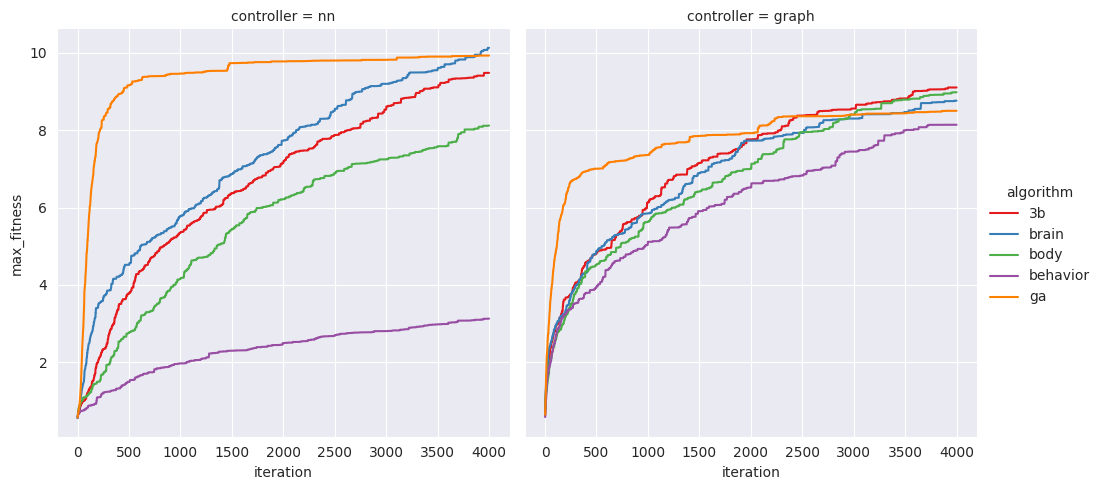

In [4]:
sns.relplot(
    data=df, x="iteration", y="max_fitness", col="controller",
    hue="algorithm", kind="line", errorbar=None, palette="Set1",
)
plt.show()

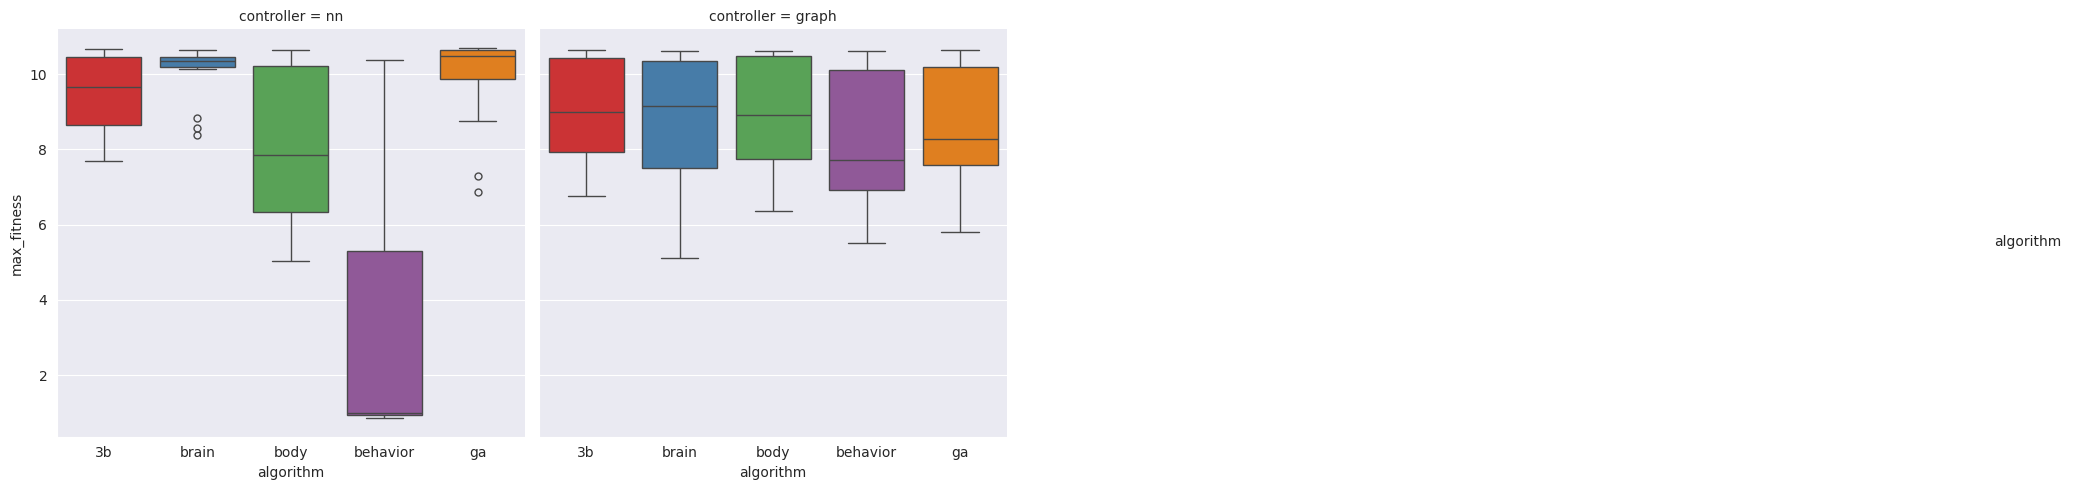

In [5]:
final_df = df[df["iteration"] == max(df["iteration"])]
sns.catplot(final_df,
            x="algorithm",
            y="max_fitness",
            col="controller",
            col_wrap=4,
            hue="algorithm",
            palette="Set1",
            kind="box",
            )
plt.show()

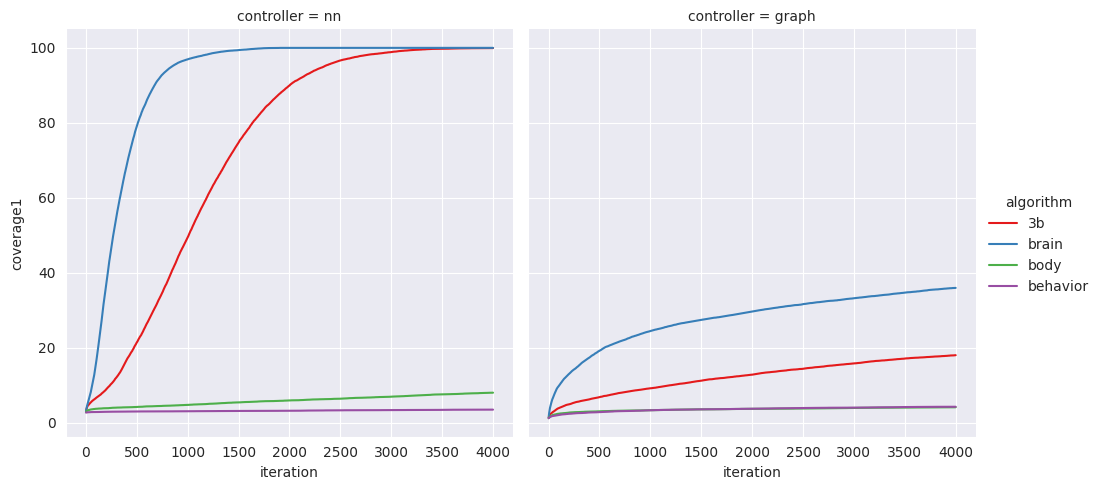

In [6]:
me_df = df[df["algorithm"] != "ga"]
sns.relplot(
    data=me_df, x="iteration", y="coverage1", col="controller",
    hue="algorithm", kind="line", errorbar=None, palette="Set1",
)
plt.show()

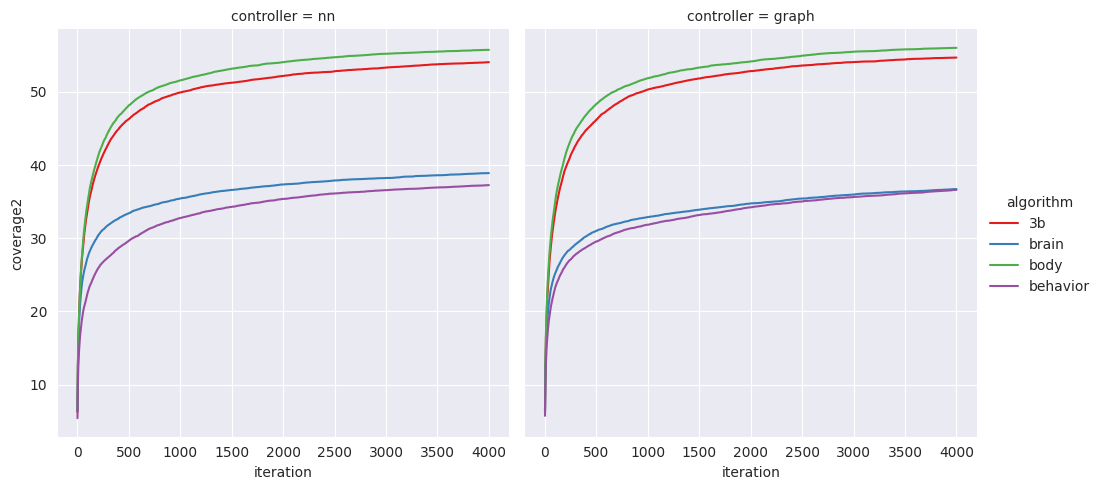

In [7]:
sns.relplot(
    data=me_df, x="iteration", y="coverage2", col="controller",
    hue="algorithm", kind="line", errorbar=None, palette="Set1",
)
plt.show()

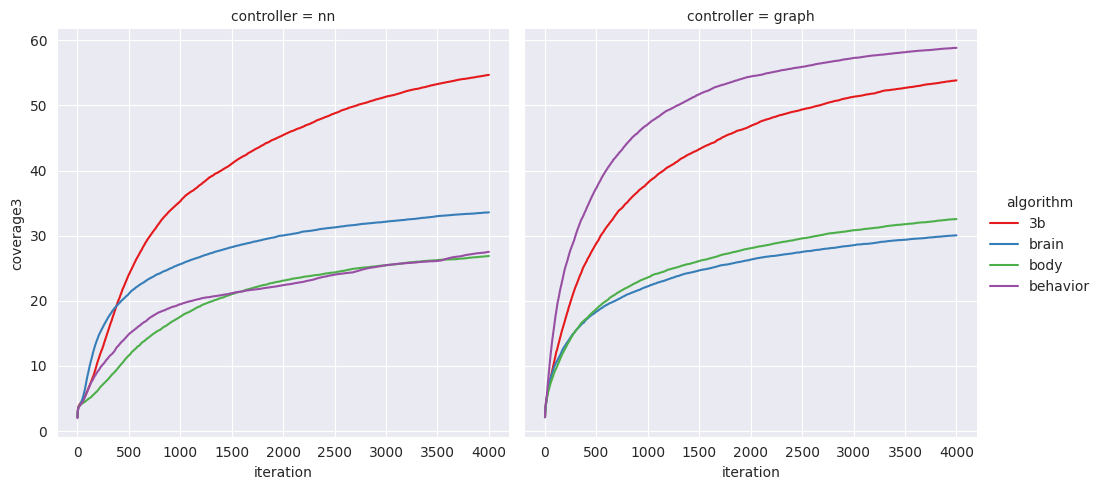

In [8]:
sns.relplot(
    data=me_df, x="iteration", y="coverage3", col="controller",
    hue="algorithm", kind="line", errorbar=None, palette="Set1",
)
plt.show()

In [9]:
tasks_extra_data = {
    "BridgeWalker-v0": ("walking", 6.6),
    "BidirectionalWalker-v0": ("walking", 8.7),

    "CustomCarrier-v0": ("object", 10.8),
    "CustomPusher-v0": ("object", 9.5),
    "Pusher-v1": ("object", 8.2),
    "Catcher-v0": ("object", -1.2),
    "BeamToppler-v0": ("object", 9.2),

    "UpStepper-v0": ("locomotion", 7.8),
    "DownStepper-v0": ("locomotion", 9.1),
    "ObstacleTraverser-v0": ("locomotion", 9.5),
    "ObstacleTraverser-v1": ("locomotion", 5.1),
    "Hurdler-v0": ("locomotion", 4.2),
    "PlatformJumper-v0": ("locomotion", 5.8),
    "GapJumper-v0": ("locomotion", 7.8),
    "Traverser-v0": ("locomotion", 5.9),
    "CaveCrawler-v0": ("locomotion", 5.6),

    "AreaMaximizer-v0": ("shape", 2.8),
    "AreaMinimizer-v0": ("shape", 1),
    "WingspanMazimizer-v0": ("shape", .87),
    "HeightMaximizer-v0": ("shape", .5),

    "Flipper-v0": ("misc", 48.3),
    "Jumper-v0": ("misc", 4.9),
    "Balancer-v0": ("misc", .16),
}

tasks = dict(tasks_extra_data)
tasks_df_dicts = []
for task_name, task_extra_info in tasks.items():
    tasks_df_dicts.append({
        "task": task_name,
        "type": task_extra_info[0],
        "max_reward": task_extra_info[1],
    })
tasks_df = pd.DataFrame(tasks_df_dicts)
tasks_df.head()

,task,type,max_reward
0,BridgeWalker-v0,walking,6.6
1,BidirectionalWalker-v0,walking,8.7
2,CustomCarrier-v0,object,10.8
3,CustomPusher-v0,object,9.5
4,Pusher-v1,object,8.2


In [10]:
solved_tasks = [
    "BridgeWalker-v0",
    "UpStepper-v0",
    "DownStepper-v0",
    "ObstacleTraverser-v0",
    "ObstacleTraverser-v1",
    "Hurdler-v0",
    "PlatformJumper-v0",
    "GapJumper-v0",
    "Traverser-v0",
    "CaveCrawler-v0",
    "CustomCarrier-v0",
    "CustomPusher-v0",
    "Catcher-v0",
    "BeamToppler-v0",
    "AreaMinimizer-v0",
    "WingspanMazimizer-v0",
    "HeightMaximizer-v0",
    "Balancer-v0",
]

In [11]:
transfer_dfs = []  #[final_df]
samplings = algo_mapping.values()
repertoires = [f"g{i + 1}" for i in range(3)]
for task in tasks:
    for controller in ["graph", "nn"]:
        for seed in range(20):
            for sampler in samplings:
                if sampler == "ga":
                    tmp_df = pd.read_csv(f"../paper_results/ga_transfer/evobb_{controller}_{seed}_{task}.csv")
                    tmp_df["seed"] = seed
                    tmp_df["task"] = task
                    tmp_df["algorithm"] = "ga"
                    tmp_df["repertoire"] = "all"
                    tmp_df["controller"] = controller
                    tmp_df["max_fitness"] = tmp_df["max_fitness"].apply(
                        lambda x: float(x.replace("[", "").replace("]", "")))
                    transfer_dfs.append(tmp_df)
                else:
                    for rep in repertoires:
                        tmp_df = pd.read_csv(
                            f"../paper_results/me_transfer/evobb_{controller}_{sampler}_{seed}_{rep}_{task}.csv")
                        tmp_df["seed"] = seed
                        tmp_df["task"] = task
                        tmp_df["algorithm"] = sampler
                        tmp_df["repertoire"] = rep
                        tmp_df["controller"] = controller
                        # tmp_df["max_fitness"] = tmp_df["max_fitness"].apply(lambda x: float(x.replace("[", "").replace("]", "")))
                        transfer_dfs.append(tmp_df)

df_transferred = pd.concat(transfer_dfs, ignore_index=True)


def assign_task_type(row):
    return tasks_extra_data[row.task][0]


def assign_expected_reward_type(row):
    return tasks_extra_data[row.task][1]


df_transferred["task_type"] = df_transferred.apply(assign_task_type, axis=1)
df_transferred["task_expected_reward"] = df_transferred.apply(assign_expected_reward_type, axis=1)
df_transferred.head()

,max_fitness,coverage1,coverage2,coverage3,seed,task,algorithm,repertoire,controller,task_type,task_expected_reward
0,4.959429,4.882812,3.417969,2.050781,0,BridgeWalker-v0,3b,g1,graph,walking,6.6
1,6.391897,0.292969,4.882812,1.269531,0,BridgeWalker-v0,3b,g2,graph,walking,6.6
2,6.391897,0.390625,3.515625,1.660156,0,BridgeWalker-v0,3b,g3,graph,walking,6.6
3,3.316065,4.882812,0.976562,0.878906,0,BridgeWalker-v0,brain,g1,graph,walking,6.6
4,3.302593,3.027344,4.882812,1.464844,0,BridgeWalker-v0,brain,g2,graph,walking,6.6


In [12]:
df_transferred["solve_fraction"] = df_transferred["max_fitness"] / df_transferred["task_expected_reward"]
df_transferred["task_with_type"] = df_transferred["task_type"].str[0].str.upper() + "-" + \
                                   df_transferred["task"]
df_transferred_and_solved = df_transferred[df_transferred["task"].isin(solved_tasks)]
df_best_transfer_per_evo_way_int = df_transferred_and_solved.loc[
    df_transferred_and_solved.groupby(["task_with_type", "task", "task_type", "algorithm", "seed", "controller"])[
        "max_fitness"].idxmax()]

In [13]:
df_best_transfer_per_evo_way_int["rank"] = \
    df_best_transfer_per_evo_way_int.groupby(["task_with_type", "controller"])[
        "max_fitness"].rank(
        method="dense",
        ascending=True) / 50.
df_best_transfer_per_evo_way = \
    df_best_transfer_per_evo_way_int.groupby(["task", "task_type", "task_with_type", "algorithm", "controller"])[
        "rank"].mean().reset_index()
df_best_transferred_mean_solve_fraction = \
    df_transferred.groupby(["task", "task_type", "task_with_type", "algorithm", "controller"])[
        "solve_fraction"].mean().reset_index()
df_best_transfer_per_evo_way.head()

,task,task_type,task_with_type,algorithm,controller,rank
0,AreaMinimizer-v0,shape,S-AreaMinimizer-v0,3b,graph,1.251
1,AreaMinimizer-v0,shape,S-AreaMinimizer-v0,3b,nn,0.997
2,AreaMinimizer-v0,shape,S-AreaMinimizer-v0,behavior,graph,1.066
3,AreaMinimizer-v0,shape,S-AreaMinimizer-v0,behavior,nn,1.413
4,AreaMinimizer-v0,shape,S-AreaMinimizer-v0,body,graph,1.433


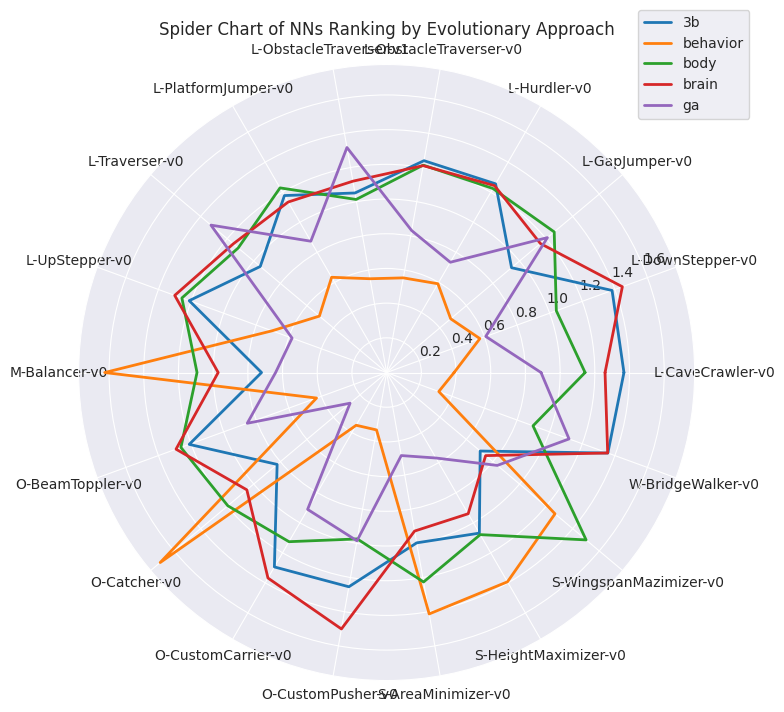

In [14]:
df_best_transfer_per_evo_way_pivot_nn = df_best_transfer_per_evo_way[
    df_best_transfer_per_evo_way["controller"] == "nn"].pivot(index="algorithm", columns="task_with_type",
                                                              values="rank")
categories = df_best_transfer_per_evo_way_pivot_nn.columns.tolist()  # Tasks as categories
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for sampling, row in df_best_transfer_per_evo_way_pivot_nn.iterrows():
    values = row.tolist()
    values += values[:1]  # Close the shape
    ax.plot(angles, values, label=sampling, linewidth=2)
    # ax.fill(angles, values, alpha=0.25)
# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.title("Spider Chart of NNs Ranking by Evolutionary Approach")

plt.show()

In [61]:
df_best_transfer_per_evo_way_pivot_nn.head()
ranked_df_best_transfer_per_evo_way_pivot_nn = df_best_transfer_per_evo_way_pivot_nn.rank(ascending=False)
ranked_df_best_transfer_per_evo_way_pivot_nn['average_rank'] = ranked_df_best_transfer_per_evo_way_pivot_nn.mean(axis=1)
ranked_df_best_transfer_per_evo_way_pivot_nn['average_rank_L'] = ranked_df_best_transfer_per_evo_way_pivot_nn.filter(
    regex='^L').mean(axis=1)
ranked_df_best_transfer_per_evo_way_pivot_nn['average_rank_O'] = ranked_df_best_transfer_per_evo_way_pivot_nn.filter(
    regex='^O').mean(axis=1)
ranked_df_best_transfer_per_evo_way_pivot_nn['average_rank_W'] = ranked_df_best_transfer_per_evo_way_pivot_nn.filter(
    regex='^W').mean(axis=1)
ranked_df_best_transfer_per_evo_way_pivot_nn['average_rank_S'] = ranked_df_best_transfer_per_evo_way_pivot_nn.filter(
    regex='^S').mean(axis=1)
ranked_df_best_transfer_per_evo_way_pivot_nn['average_rank_M'] = ranked_df_best_transfer_per_evo_way_pivot_nn.filter(
    regex='^M').mean(axis=1)
ranked_df_best_transfer_per_evo_way_pivot_nn[
    ['average_rank', 'average_rank_L', 'average_rank_W', 'average_rank_O', 'average_rank_S', 'average_rank_M']].head()

task_with_type,average_rank,average_rank_L,average_rank_W,average_rank_O,average_rank_S,average_rank_M
algorithm,,,,,,
3b,2.666667,2.333333,1.0,2.75,3.666667,4.0
behavior,3.888889,4.888889,5.0,4.00,1.333333,1.0
body,2.444444,2.444444,4.0,2.75,1.666667,2.0
brain,2.333333,2.111111,2.0,1.50,4.000000,3.0
ga,3.666667,3.222222,3.0,4.00,4.333333,5.0


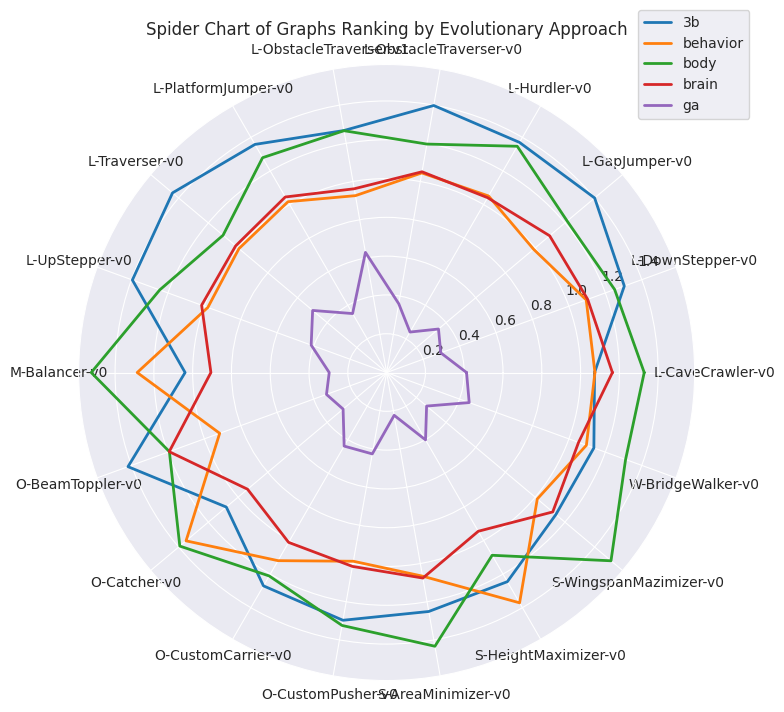

In [23]:
df_best_transfer_per_evo_way_pivot_graph = df_best_transfer_per_evo_way[
    df_best_transfer_per_evo_way["controller"] == "graph"].pivot(index="algorithm", columns="task_with_type",
                                                                 values="rank")
categories = df_best_transfer_per_evo_way_pivot_graph.columns.tolist()  # Tasks as categories
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for sampling, row in df_best_transfer_per_evo_way_pivot_graph.iterrows():
    values = row.tolist()
    values += values[:1]  # Close the shape
    ax.plot(angles, values, label=sampling, linewidth=2)
    # ax.fill(angles, values, alpha=0.25)
# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.title("Spider Chart of Graphs Ranking by Evolutionary Approach")

plt.show()

In [62]:
df_best_transfer_per_evo_way_pivot_graph.head()
ranked_df_best_transfer_per_evo_way_pivot_graph = df_best_transfer_per_evo_way_pivot_graph.rank(ascending=False)
ranked_df_best_transfer_per_evo_way_pivot_graph['average_rank'] = ranked_df_best_transfer_per_evo_way_pivot_graph.mean(
    axis=1)
ranked_df_best_transfer_per_evo_way_pivot_graph[
    'average_rank_L'] = ranked_df_best_transfer_per_evo_way_pivot_graph.filter(
    regex='^L').mean(axis=1)
ranked_df_best_transfer_per_evo_way_pivot_graph[
    'average_rank_O'] = ranked_df_best_transfer_per_evo_way_pivot_graph.filter(
    regex='^O').mean(axis=1)
ranked_df_best_transfer_per_evo_way_pivot_graph[
    'average_rank_W'] = ranked_df_best_transfer_per_evo_way_pivot_graph.filter(
    regex='^W').mean(axis=1)
ranked_df_best_transfer_per_evo_way_pivot_graph[
    'average_rank_S'] = ranked_df_best_transfer_per_evo_way_pivot_graph.filter(
    regex='^S').mean(axis=1)
ranked_df_best_transfer_per_evo_way_pivot_graph[
    'average_rank_M'] = ranked_df_best_transfer_per_evo_way_pivot_graph.filter(
    regex='^M').mean(axis=1)
ranked_df_best_transfer_per_evo_way_pivot_graph[
    ['average_rank', 'average_rank_L', 'average_rank_W', 'average_rank_O', 'average_rank_S', 'average_rank_M']].head()

task_with_type,average_rank,average_rank_L,average_rank_W,average_rank_O,average_rank_S,average_rank_M
algorithm,,,,,,
3b,1.666667,1.333333,2.0,1.75,2.000000,3.0
behavior,3.388889,3.777778,3.0,3.25,3.000000,2.0
body,1.722222,1.888889,1.0,1.75,1.666667,1.0
brain,3.222222,3.000000,4.0,3.25,3.333333,4.0
ga,5.000000,5.000000,5.0,5.00,5.000000,5.0


In [64]:
ranks = ['average_rank', 'average_rank_L', 'average_rank_W', 'average_rank_O', 'average_rank_S', 'average_rank_M']
for rank_df in [ranked_df_best_transfer_per_evo_way_pivot_nn.reset_index(inplace=False),
                ranked_df_best_transfer_per_evo_way_pivot_graph.reset_index(inplace=False)]:
    for rnk in ranks:
        rnk_vals = []
        for sam in ["3b", "brain", "body", "behavior", "ga"]:
            tmp_val = rank_df[rank_df["algorithm"] == sam].reset_index()
            value = tmp_val[rnk].tolist()[0]
            rnk_vals.append("{:.2f}".format(value))
        print(rnk[-1], " & ", " & ".join(rnk_vals) + " \\\\")

k  &  2.67 & 2.33 & 2.44 & 3.89 & 3.67 \\
L  &  2.33 & 2.11 & 2.44 & 4.89 & 3.22 \\
W  &  1.00 & 2.00 & 4.00 & 5.00 & 3.00 \\
O  &  2.75 & 1.50 & 2.75 & 4.00 & 4.00 \\
S  &  3.67 & 4.00 & 1.67 & 1.33 & 4.33 \\
M  &  4.00 & 3.00 & 2.00 & 1.00 & 5.00 \\
k  &  1.67 & 3.22 & 1.72 & 3.39 & 5.00 \\
L  &  1.33 & 3.00 & 1.89 & 3.78 & 5.00 \\
W  &  2.00 & 4.00 & 1.00 & 3.00 & 5.00 \\
O  &  1.75 & 3.25 & 1.75 & 3.25 & 5.00 \\
S  &  2.00 & 3.33 & 1.67 & 3.00 & 5.00 \\
M  &  3.00 & 4.00 & 1.00 & 2.00 & 5.00 \\


In [19]:
nn_behavior_archive_coverage = None
graph_behavior_archive_coverage = None
rep = "r3"
for seed in range(20):
    archive_nn = jnp.load(f"../paper_results/me/evobb_nn_3b_{seed}/{rep}_fitnesses.npy") > -jnp.inf
    archive_graph = jnp.load(f"../paper_results/me/evobb_graph_3b_{seed}/{rep}_fitnesses.npy") > -jnp.inf
    if seed == 0:
        nn_behavior_archive_coverage = archive_nn
        graph_behavior_archive_coverage = archive_graph
    else:
        nn_behavior_archive_coverage = jnp.logical_or(archive_nn, nn_behavior_archive_coverage)
        graph_behavior_archive_coverage = jnp.logical_or(archive_graph, graph_behavior_archive_coverage)
shared_cells = jnp.sum(jnp.logical_and(nn_behavior_archive_coverage, graph_behavior_archive_coverage))
non_shared_cells = jnp.sum(jnp.logical_xor(nn_behavior_archive_coverage, graph_behavior_archive_coverage))
global_coverage = jnp.sum(np.logical_or(nn_behavior_archive_coverage, graph_behavior_archive_coverage))
print(
    f"Total nn coverage: {jnp.sum(nn_behavior_archive_coverage)}, total graph coverage: {jnp.sum(graph_behavior_archive_coverage)}")
print(f"Shared cells: {shared_cells}, non-shared cells: {non_shared_cells}, global coverage: {global_coverage}")

Total nn coverage: 674, total graph coverage: 677
Shared cells: 661, non-shared cells: 29, global coverage: 690


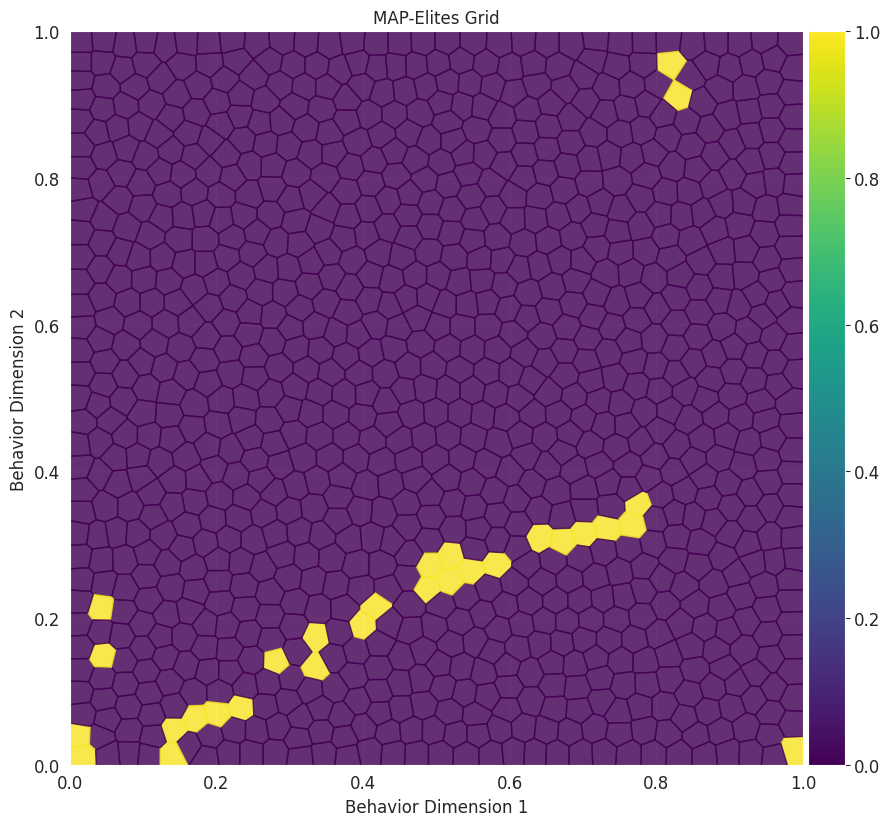

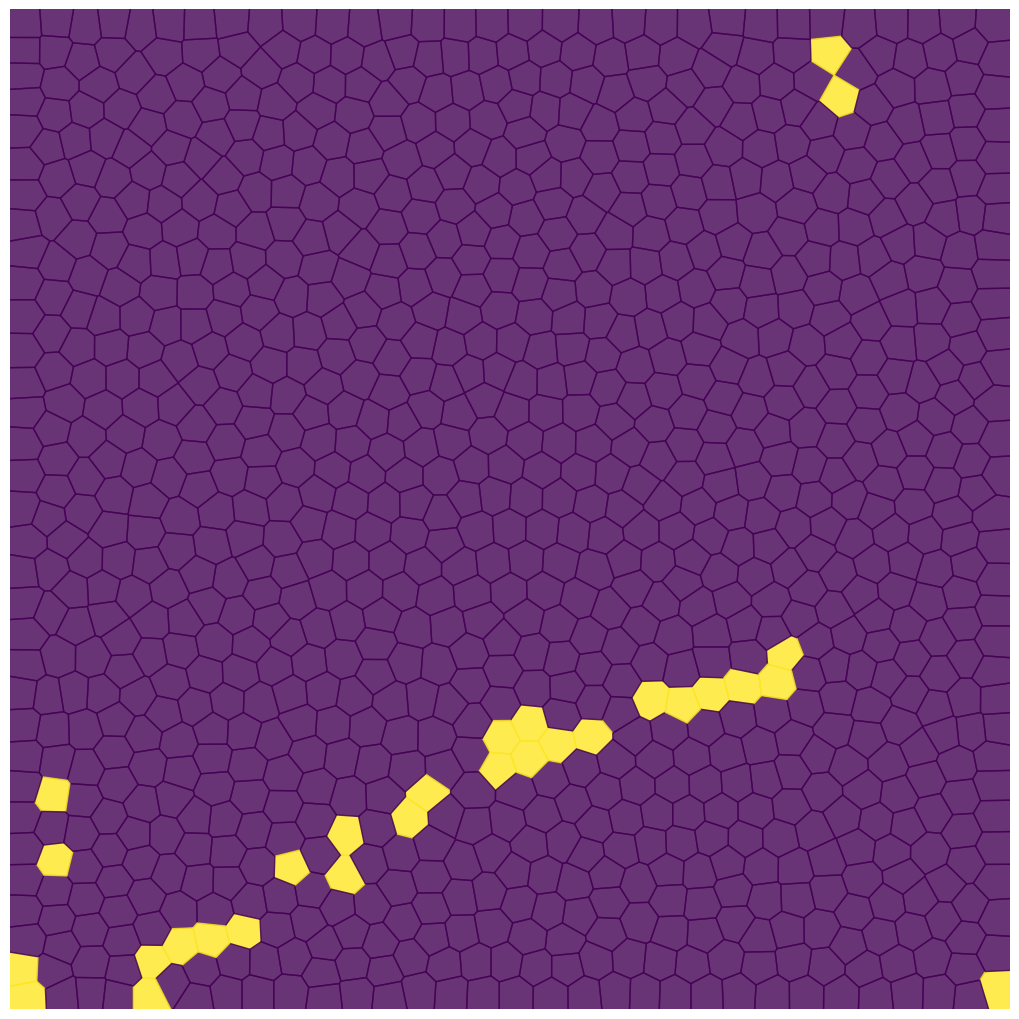

In [96]:
nn_behavior_archive_coverage = None
graph_behavior_archive_coverage = None
centroids = None
rep = "r3"
for seed in range(20):
    archive_nn = (jnp.load(f"../paper_results/me/evobb_nn_3b_{seed}/{rep}_fitnesses.npy") > -jnp.inf).astype(int)
    archive_graph = (jnp.load(f"../paper_results/me/evobb_graph_3b_{seed}/{rep}_fitnesses.npy") > -jnp.inf).astype(int)
    if seed == 0:
        centroids = jnp.load(f"../paper_results/me/evobb_nn_3b_{seed}/{rep}_centroids.npy")
        nn_behavior_archive_coverage = archive_nn
        graph_behavior_archive_coverage = archive_graph
    else:
        nn_behavior_archive_coverage += archive_nn
        graph_behavior_archive_coverage += archive_graph

nn_behavior_archive_coverage = jnp.where(nn_behavior_archive_coverage > 0, 1, 0)
graph_behavior_archive_coverage = jnp.where(graph_behavior_archive_coverage > 0, 1, 0)
different_coverage = jnp.abs(nn_behavior_archive_coverage - graph_behavior_archive_coverage)
plot_2d_map_elites_repertoire(
    centroids=centroids,
    repertoire_fitnesses=different_coverage,
    minval=0.,
    maxval=1.
)
v_min, v_max = plot_2d_map_elites_repertoire_for_pgfplots(
        centroids=centroids,
        repertoire_fitnesses=different_coverage,
        minval=jnp.asarray([0, 0]),
        maxval=jnp.asarray([1, 1]),
        vmin=0,
        vmax=1,
        target_file=f"../pgfplots/repertoire_behavior_01_difference.pdf"
    )
plt.show()

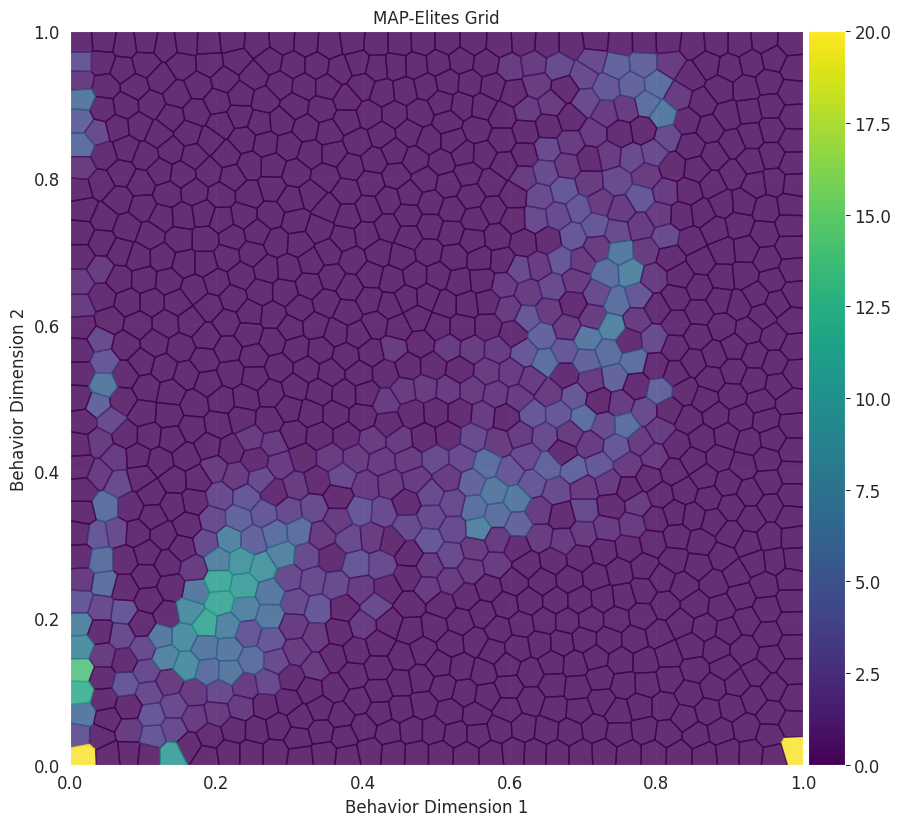

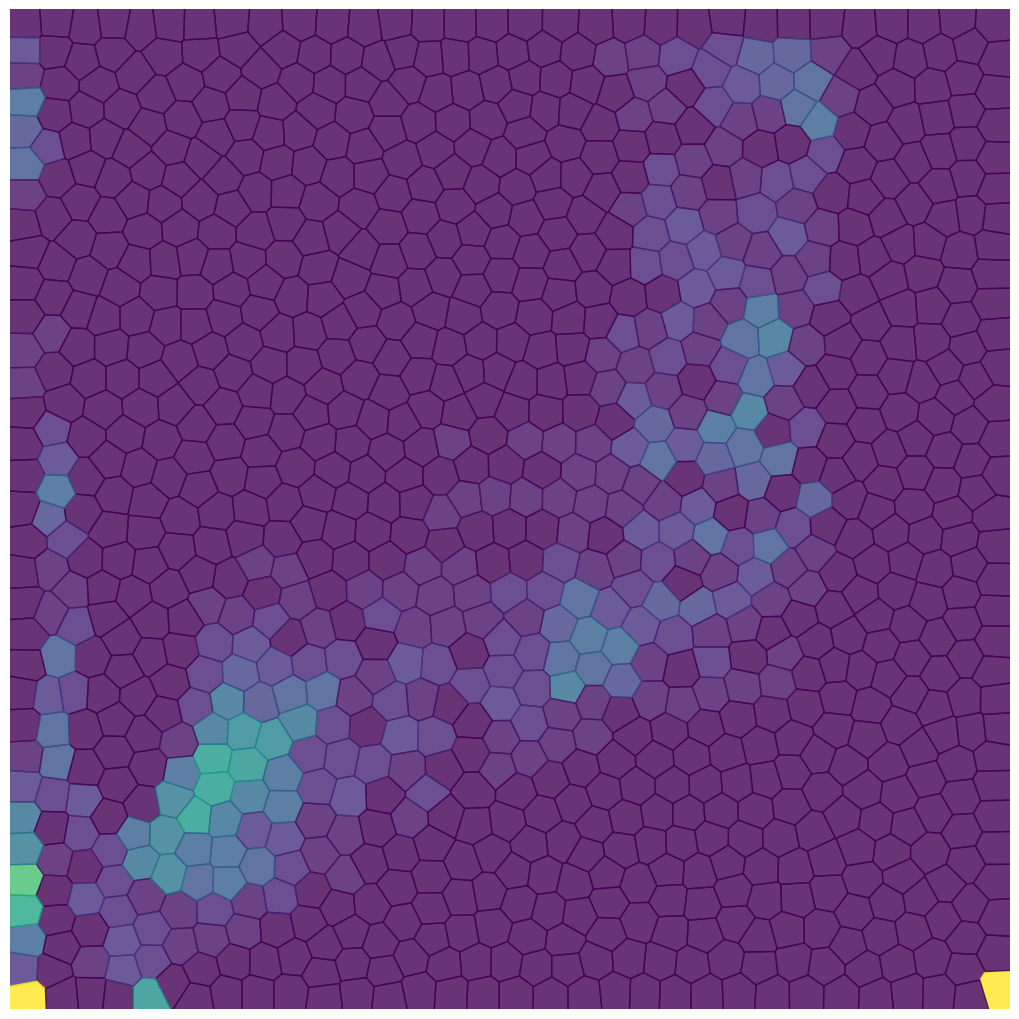

In [92]:
nn_behavior_archive_coverage = None
graph_behavior_archive_coverage = None
centroids = None
rep = "r3"
for seed in range(20):
    archive_nn = (jnp.load(f"../paper_results/me/evobb_nn_3b_{seed}/{rep}_fitnesses.npy") > -jnp.inf).astype(int)
    archive_graph = (jnp.load(f"../paper_results/me/evobb_graph_3b_{seed}/{rep}_fitnesses.npy") > -jnp.inf).astype(int)
    if seed == 0:
        centroids = jnp.load(f"../paper_results/me/evobb_nn_3b_{seed}/{rep}_centroids.npy")
        nn_behavior_archive_coverage = archive_nn
        graph_behavior_archive_coverage = archive_graph
    else:
        nn_behavior_archive_coverage += archive_nn
        graph_behavior_archive_coverage += archive_graph
different_coverage = jnp.abs(nn_behavior_archive_coverage - graph_behavior_archive_coverage)
plot_2d_map_elites_repertoire(
    centroids=centroids,
    repertoire_fitnesses=different_coverage,
    minval=0.,
    maxval=1.
)
plt.show()
v_min, v_max = plot_2d_map_elites_repertoire_for_pgfplots(
        centroids=centroids,
        repertoire_fitnesses=different_coverage,
        minval=jnp.asarray([0, 0]),
        maxval=jnp.asarray([1, 1]),
        vmin=0,
        vmax=20,
        target_file=f"../pgfplots/repertoire_behavior_difference.pdf"
    )

In [89]:
def process_expression(expression: str) -> str:
    sens_order = ["c_{i", "v_{x,i", "v_{y,i"]
    arrows_order = [",\\nwarrow", ",\\uparrow", ",\\nearrow",
                    ",\\leftarrow", "", ",\\rightarrow",
                    ",\\swarrow", ",\\downarrow", ",\\searrow",
                    ]
    expression = expression.replace("o0", "a^{(k)}_i")
    expression = expression.replace("cos", "\\cos").replace("sin", "\\sin").replace("log", "\\log").replace("exp",
                                                                                                            "\\exp")
    input_counter = len(arrows_order) * len(sens_order)
    for arrow in reversed(arrows_order):
        for sens in reversed(sens_order):
            input_counter -= 1
            target = f"{sens}{arrow}}}^{{(k)}}"
            expression = expression.replace(f"i{input_counter}", target)

    return "$" + expression + "$"

In [90]:
from bbbqd.brain.brain_descriptors import get_graph_descriptor_extractor
from qdax.core.gp.interpretability_utils import size, count_operations, evaluate_interpretability
from qdax.core.gp.visualization_utils import expression_from_genome
from bbbqd.body.body_utils import compute_body_mask, compute_body_float_genome_length
from pathlib import Path
import yaml

formula_sizes = []
interpretability_scores = []
formulae = []
fitness_values = []
for seed in range(20):
    config = yaml.safe_load(Path(f"../paper_results/me/evobb_graph_3b_{seed}/config.yaml").read_text())
    brain_descr_fn, _ = get_graph_descriptor_extractor(config)
    fitnesses = jnp.load(f"../paper_results/me/evobb_graph_3b_{seed}/r1_fitnesses.npy")
    best_genotype = jnp.load(f"../paper_results/me/evobb_graph_3b_{seed}/r1_genotypes.npy")[
        jnp.argmax(fitnesses)]
    fitness_values.append(jnp.max(fitnesses).item())
    body_mask_length = len(compute_body_mask(config))
    body_float_length = compute_body_float_genome_length(config)
    _, controller_genome = jnp.split(best_genotype, [body_mask_length + body_float_length])
    brain_descriptors = brain_descr_fn(controller_genome)
    expr = expression_from_genome(controller_genome.astype(int), config)
    formula_sizes.append(count_operations(expr))
    interpretability_scores.append(evaluate_interpretability(expr))
    print(process_expression(expr), " & ", "{:.2f}".format(jnp.max(fitnesses).item()), " & $(",
          ", ".join(map(str, brain_descriptors)),
          ")$ \\\\")

# print(sum(formula_sizes) / len(formula_sizes))
# # print(sum(interpretability_scores) / len(interpretability_scores))
# print(formula_sizes)
# print(fitness_values)

$a^{(k)}_i = (v_{x,i,\leftarrow}^{(k)}-v_{x,i,\searrow}^{(k)})
$  &  10.42  & $( 0.0, 0.02 )$ \\
$a^{(k)}_i = v_{y,i,\leftarrow}^{(k)}
$  &  9.00  & $( 0.0, 0.0 )$ \\
$a^{(k)}_i = ((c_{i}^{(k)}+v_{x,i}^{(k)})-v_{x,i,\uparrow}^{(k)})
$  &  10.59  & $( 0.0, 0.04 )$ \\
$a^{(k)}_i = ((v_{x,i,\leftarrow}^{(k)}-v_{x,i,\nearrow}^{(k)})-(v_{x,i,\downarrow}^{(k)}/v_{y,i,\leftarrow}^{(k)}))
$  &  7.94  & $( 0.0, 0.06 )$ \\
$a^{(k)}_i = ((\cos(c_{i}^{(k)})+v_{y,i,\nwarrow}^{(k)})-\log(\exp((v_{y,i,\nearrow}^{(k)}*c_{i,\rightarrow}^{(k)}))))
$  &  7.52  & $( 0.06, 0.06 )$ \\
$a^{(k)}_i = (v_{x,i,\downarrow}^{(k)}-v_{x,i,\nearrow}^{(k)})
$  &  8.91  & $( 0.0, 0.02 )$ \\
$a^{(k)}_i = (c_{i,\leftarrow}^{(k)}-v_{y,i,\nearrow}^{(k)})
$  &  7.27  & $( 0.0, 0.02 )$ \\
$a^{(k)}_i = sqrt(\log(c_{i,\nwarrow}^{(k)}))
$  &  10.65  & $( 0.04, 0.0 )$ \\
$a^{(k)}_i = (v_{y,i}^{(k)}/c_{i}^{(k)})
$  &  10.18  & $( 0.0, 0.02 )$ \\
$a^{(k)}_i = ((v_{x,i,\swarrow}^{(k)}+c_{i,\uparrow}^{(k)})-v_{x,i,\nearrow}^{(k)})
$